# Other Analysis
We compare the number of new lines in relation to the length of the essay. Then we analyze the most frequently used words. Finally, we compare them with the topic and with each other.

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import config

path = config.system_path

plt.rcParams["figure.figsize"] = (config.fig_x, config.fig_y)

def plot_smooth(x, y, label, color):
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = label, color = color)


essays = pd.read_csv(path + "preprocessed_data.csv", sep=";", encoding="UTF-8")

# Counting the numer of newlines
essays["Newlines Student"] = essays["Student Essay"].apply(lambda x: x.count("\n"))
essays["Newlines ChatGPT Essay 0.2"] = essays["ChatGPT Essay 0.2"].apply(lambda x: x.count("\n"))
essays["Newlines ChatGPT Essay 0.9"] = essays["ChatGPT Essay 0.9"].apply(lambda x: x.count("\n"))


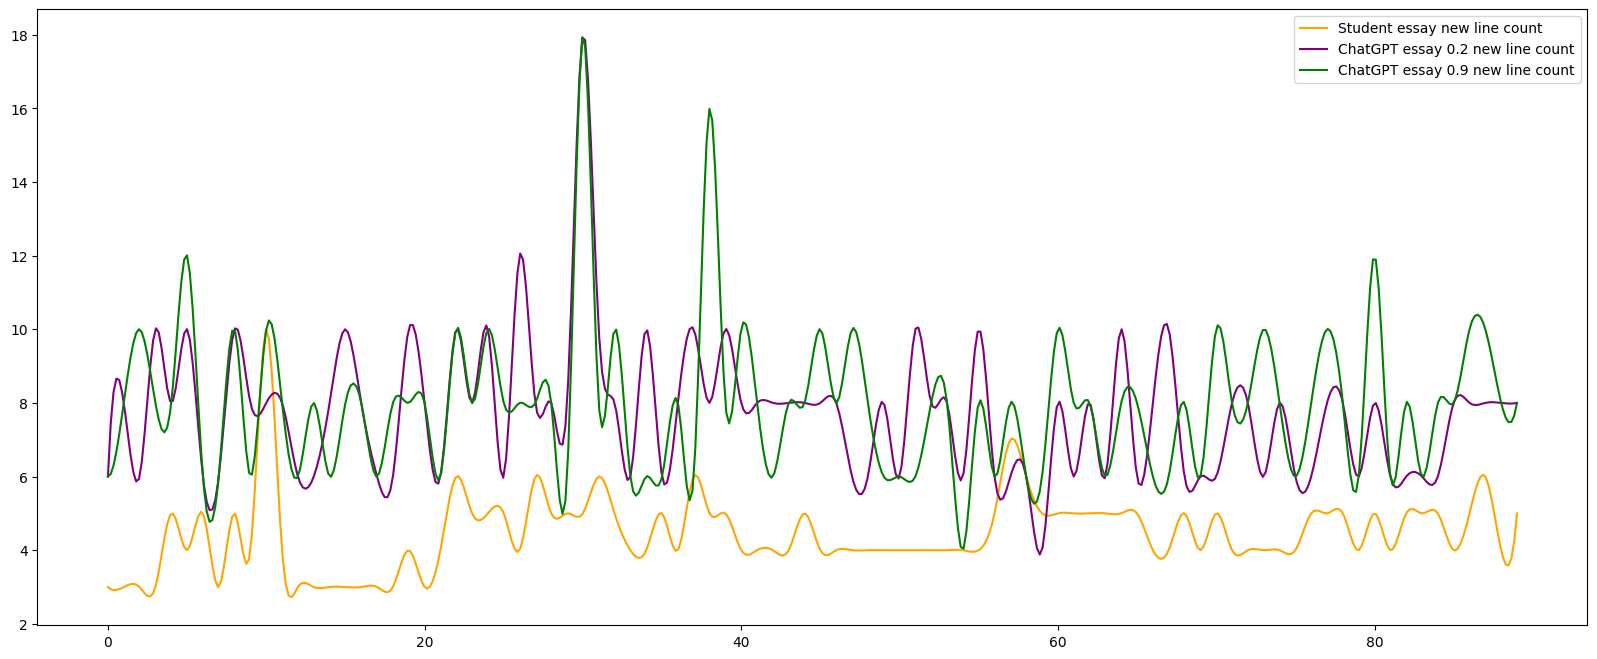

In [360]:
plot_smooth(essays["Unnamed: 0"], essays["Newlines Student"], "Student essay new line count", "orange")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.2"], "ChatGPT essay 0.2 new line count", "purple")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.9"], "ChatGPT essay 0.9 new line count", "green")
plt.legend()
plt.show()


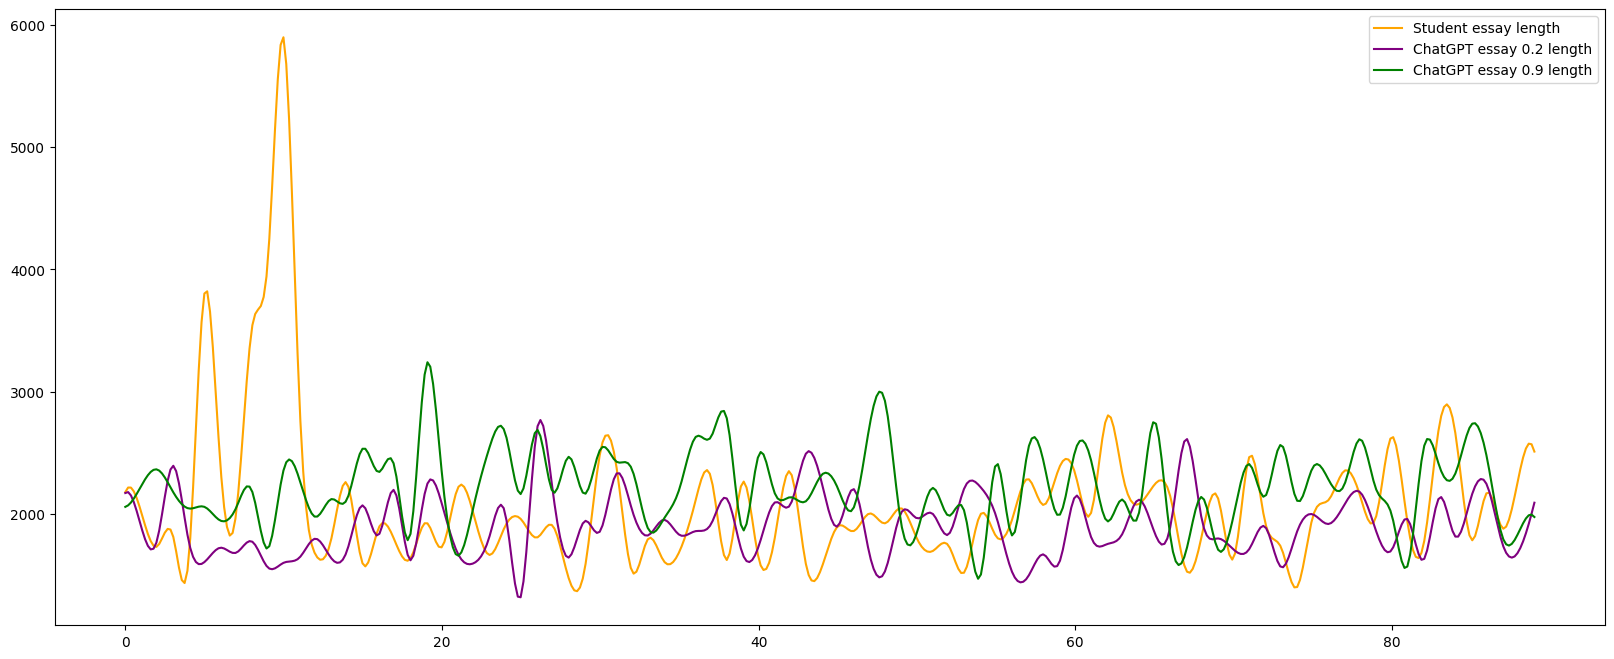

In [361]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay length"], "Student essay length", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2 length"], "ChatGPT essay 0.2 length", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9 length"], "ChatGPT essay 0.9 length", "green")
plt.legend()
plt.show()

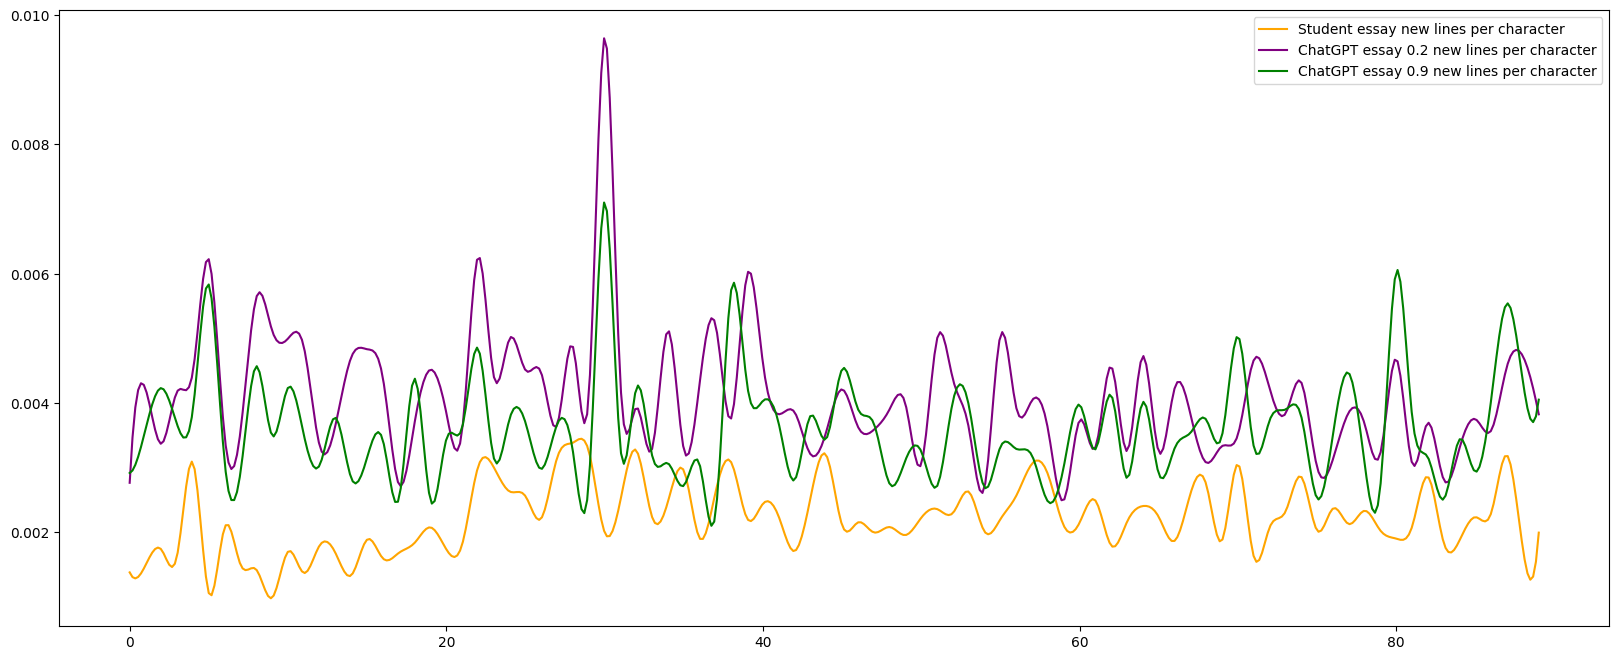

In [362]:
plot_smooth(essays["Unnamed: 0"],  essays["Newlines Student"] / essays["Student Essay length"], "Student essay new lines per character", "orange")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.2"] / essays["ChatGPT Essay 0.2 length"], "ChatGPT essay 0.2 new lines per character", "purple")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.9"] / essays["ChatGPT Essay 0.9 length"], "ChatGPT essay 0.9 new lines per character", "green")
plt.legend()
plt.show()

In [363]:
from nltk.corpus import stopwords
import spacy
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

ps = PorterStemmer()
nlp = spacy.load('en_core_web_sm')
stop_words_nltk = set(stopwords.words('english'))

# Building regex with stopwords 
stop_regex = "\s("
for word in nlp.Defaults.stop_words:
    stop_regex +=  "(" + word + ")|"
stop_regex = stop_regex.removesuffix("|")
stop_regex += ")\s"

# Return 100 most common words not in the excluding strings  
def return_most_used_words(input):
    allWordDist = nltk.FreqDist(w for w in word_tokenize(input) if w not in [".", ",", ";", ":", "?", "!", "\'", "\"", "’", "the", "s", "a", "i", "to", "for"])
    return allWordDist.most_common(100)

# Count the number of words in the identifier column by making them lowercase, removing stop words and stemming them
def count_words(idnetifier):
    essays[idnetifier] = essays[idnetifier].apply(lambda x: x.lower())
    essays[idnetifier].replace(to_replace=stop_regex, value=" ", regex=True, inplace=True)
    essays[idnetifier] = essays[idnetifier].apply(lambda x: ps.stem(x))
    return essays[idnetifier].apply(lambda x: return_most_used_words(x))

words_Students = count_words("Student Essay")
words_ChatGPT_02 = count_words("ChatGPT Essay 0.2")
words_ChatGPT_09 = count_words("ChatGPT Essay 0.9")
words_topic = count_words("Topic")

# Counts the number of words in common_words which are not in diff_words
def get_word_diff(common_words, diff_words):
    output = []
    for i in range(len(common_words)):
        counter = 0
        words = common_words[i]
        diff = [t[0] for t in diff_words[i]]
        for word in words:
            if word[0] not in diff:
                counter += 1
        output.append(counter)
    return output  

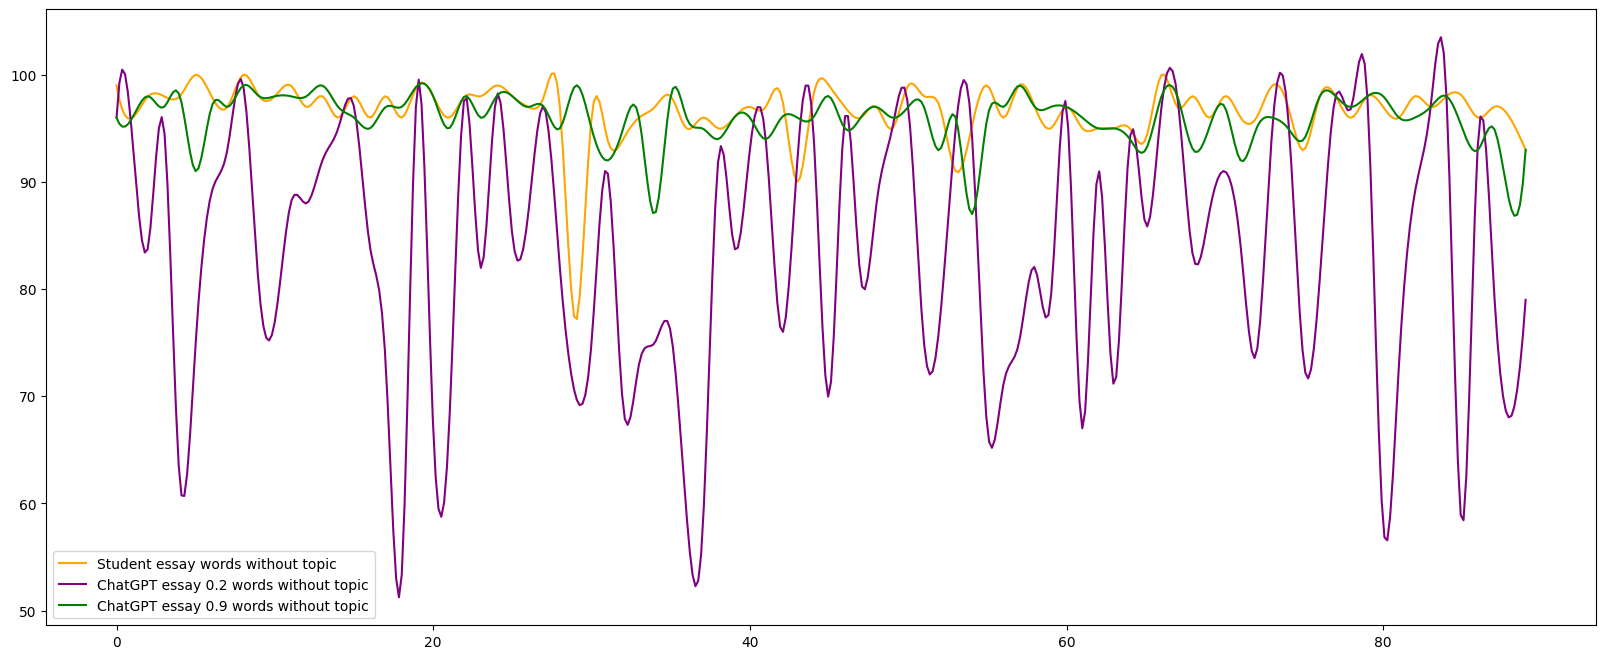

In [364]:
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_Students, words_topic), "Student essay words without topic", "orange")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_02, words_topic), "ChatGPT essay 0.2 words without topic", "purple")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_09, words_topic), "ChatGPT essay 0.9 words without topic", "green")
plt.legend()
plt.show()

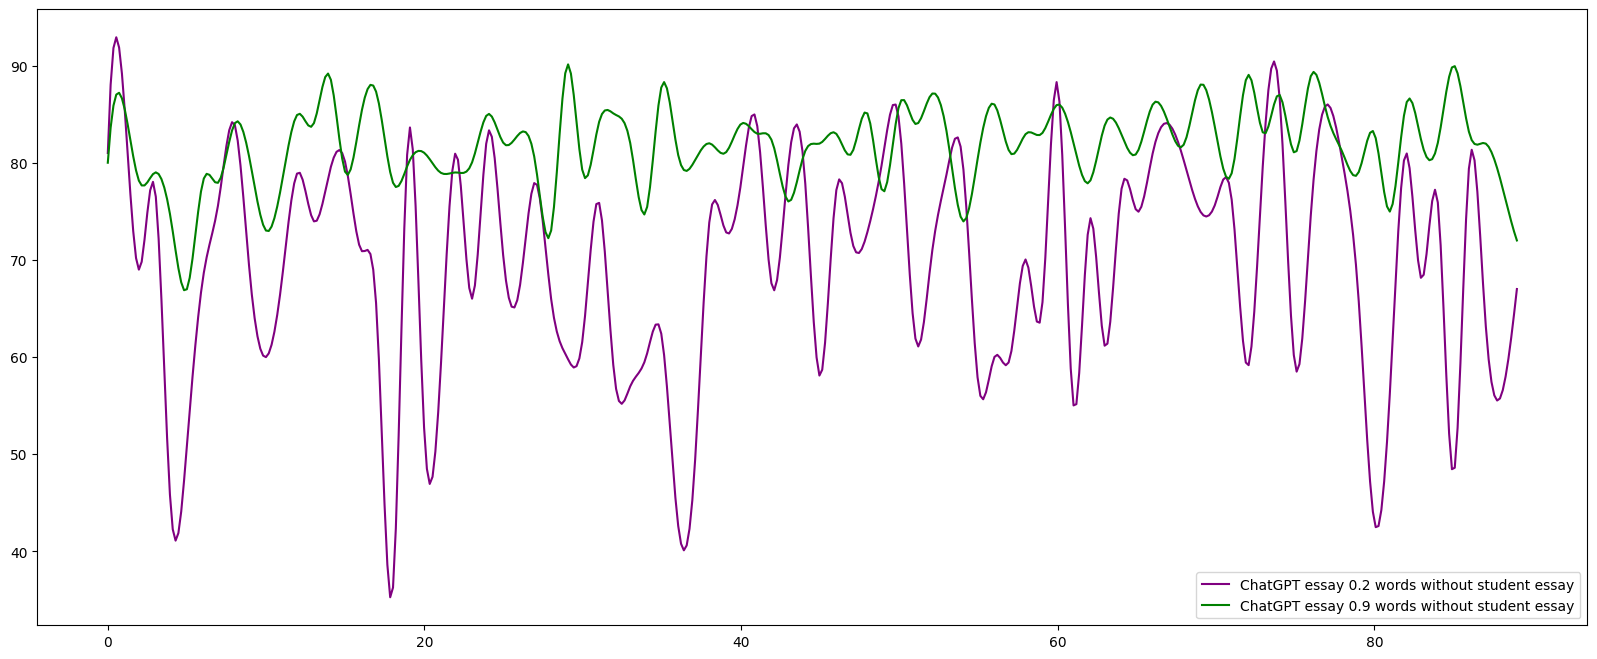

In [365]:
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_02, words_Students), "ChatGPT essay 0.2 words without student essay", "purple")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_09, words_Students), "ChatGPT essay 0.9 words without student essay", "green")
plt.legend()
plt.show()

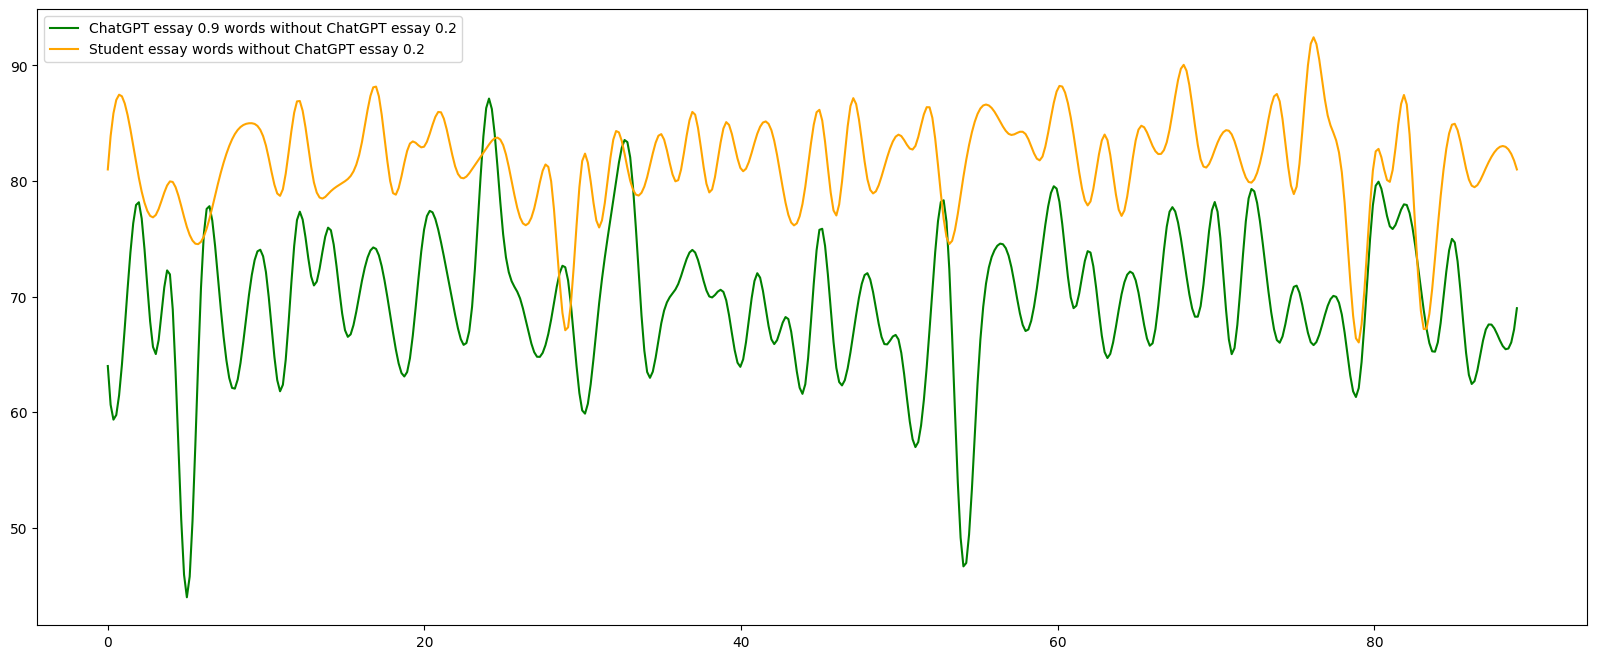

In [366]:
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_09, words_ChatGPT_02), "ChatGPT essay 0.9 words without ChatGPT essay 0.2", "green")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_Students, words_ChatGPT_02), "Student essay words without ChatGPT essay 0.2", "orange")
plt.legend()
plt.show()

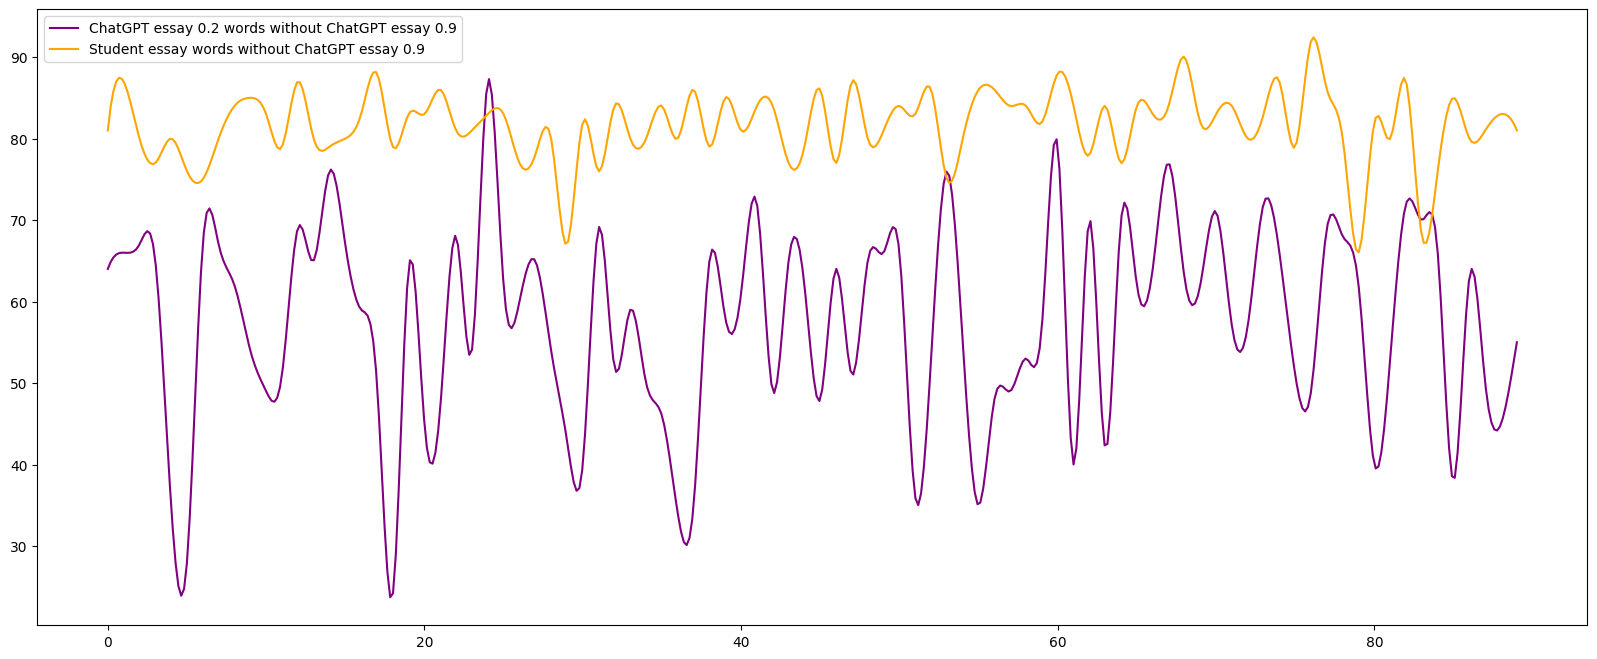

In [367]:
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_02, words_ChatGPT_09), "ChatGPT essay 0.2 words without ChatGPT essay 0.9", "purple")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_Students, words_ChatGPT_02), "Student essay words without ChatGPT essay 0.9", "orange")
plt.legend()
plt.show()